# Visualization - Seaborn

## Graphs

* Line chart
* Bar chart
* Scatter plot
* Bubble plot
* Area plot and stacked plot
* Pie chart
* Circle chart
* Table chart
* Treemap chart
* The Sankey class
* Polar chart
* Histogram
* Lollipot chart
* Heatmap chart


### Import libraries

* datetime
* math
* pandas
* random
* radar
* faker
* matplotlib
* calendar
* numpy
* seaborn
* squarify
* scipy

In [ ]:


!pip install radar faker seaborn matplotlib pandas numpy squarify scipy quandl  seaborn

In [7]:
import random
import radar
from faker import Faker
import calendar 
import datetime
import math

import numpy as np
import pandas as pd
import scipy
import pylab


import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
from matplotlib.patches import Circle

import seaborn as sns
import squarify
import  quandl 


### Line chart

In [8]:
df = pd.DataFrame({'hour':[1,2,3,4,5],'no_2_mean':[13.375,30.041667,30.666667,20.416667,16.958333]})
df.head()
    

,hour,no_2_mean
0,1,13.375000
1,2,30.041667
2,3,30.666667
3,4,20.416667
4,5,16.958333


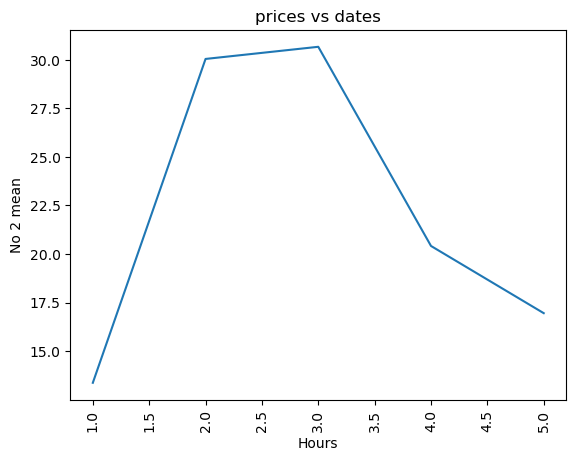

In [9]:
# Define title and size
g = sns.lineplot(x='hour',y='no_2_mean',data=df)
g.set(title='prices vs dates',xlabel='Hours',ylabel='No 2 mean')
plt.xticks(rotation=90)
plt.show();


#### Semilogarithm Graph

In [12]:
x = np.arange(0., 20, 0.01)
y = np.sin(np.pi*(x**(1.0/2.0)))
df = pd.DataFrame({"x": x,"y":y})
df

,x,y
0,0.00,0.000000
1,0.01,0.309017
2,0.02,0.429815
3,0.03,0.517682
4,0.04,0.587785
...,...,...
1995,19.95,0.994481
1996,19.96,0.994844
1997,19.97,0.995194
1998,19.98,0.995532


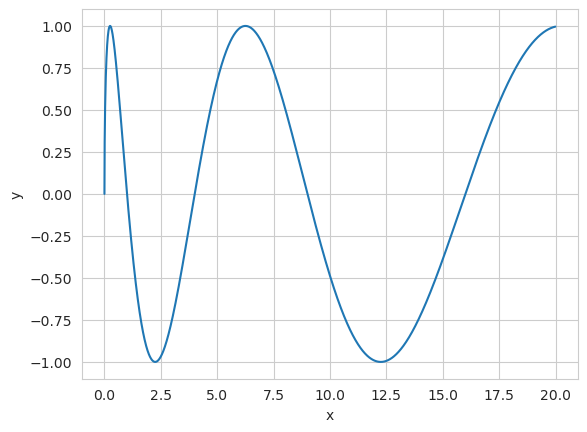

In [13]:
sns.set_style('whitegrid')
g=sns.lineplot(data=df,x='x',y='y',dashes=0)

plt.show()

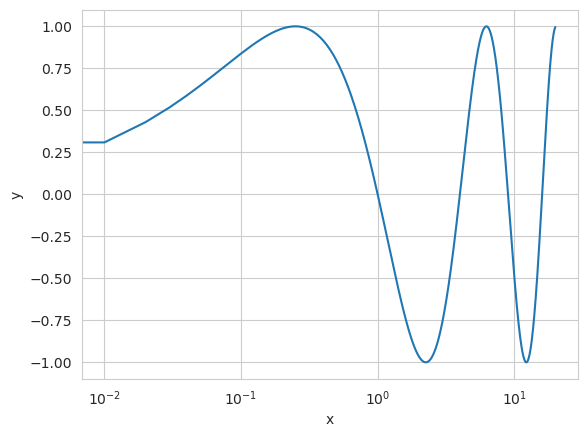

In [14]:
sns.set_style('whitegrid')
g=sns.lineplot(data=df,x='x',y='y',dashes=0)
g.set(xscale='log')
plt.show()

#### Polar coordinates

r = 2 cosine(pi*t)   0<t <2

In [15]:
theta = np.arange(0., 2., 0.005)*np.pi

r = 2*np.abs(np.cos(theta))


In [16]:
df = pd.DataFrame({"theta": theta,"r": r})


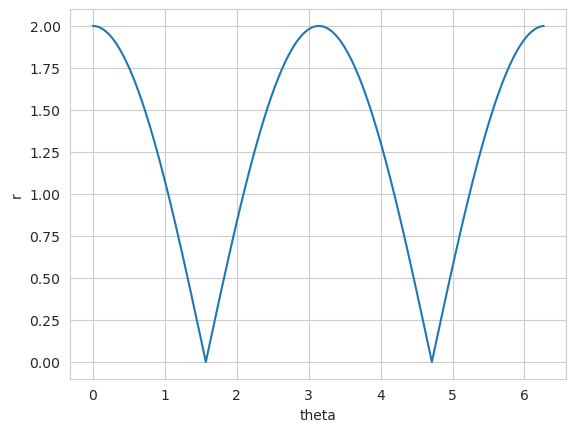

In [18]:
sns.set_style('whitegrid')
g=sns.lineplot(data=df,x='theta',y='r',dashes=0)
#g.set(xscale='log')
plt.show()

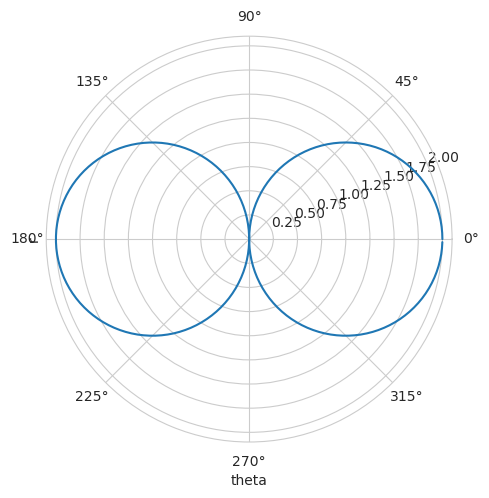

In [19]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, subplot_kws=dict(projection='polar'), height=5, sharex=False, sharey=False, despine=False)
g.map_dataframe(sns.lineplot, x='theta', y='r')
plt.show()


#### Graph Sin

In [21]:
x=np.linspace(0,10,30)
y=np.sin(x)
data = pd.DataFrame({"x":x, "y":y})

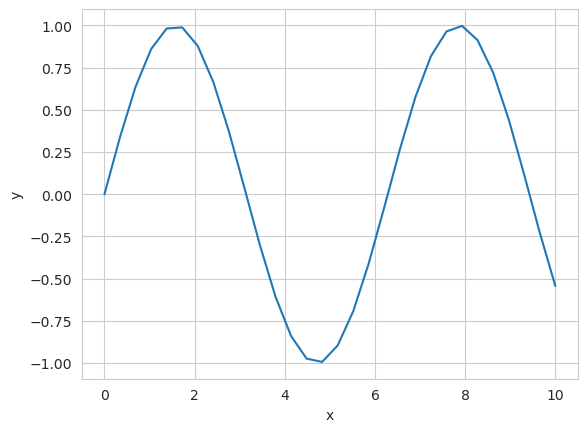

In [25]:
sns.lineplot(data = data,x='x',y='y', palette = "rocket")
plt.show();

### Bar chart

In [35]:
# Setup data 12 months

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
sold_quantity = [round(random.uniform(100, 200)) for x in range(1, 13)]
df = pd.DataFrame({"months": months, "sold_quantity":sold_quantity})
df

,months,sold_quantity
0,Jan,132
1,Feb,184
2,Mar,146
3,Apr,122
4,May,116
5,Jun,148
6,Jul,162
7,Aug,143
8,Sept,120
9,Oct,177


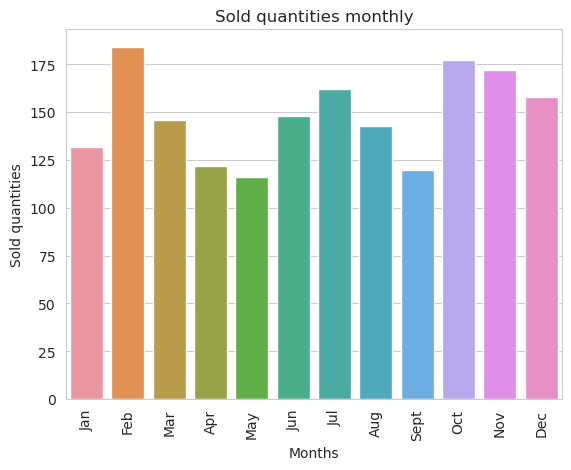

In [38]:
g = sns.barplot(x='months',y='sold_quantity',data=df)
g.set(title='Sold quantities monthly',xlabel='Months',ylabel='Sold quantities')
plt.xticks(rotation=90)
plt.show()

Add values on each bar

We could change x-axis to y-axis

### Scatter Plots 

In [40]:
df = pd.DataFrame({
    "girls_grades" : [89, 90, 70, 89, 100, 80, 90, 100, 80, 34],
    "boys_grades" : [30, 29, 49, 48, 100, 48, 38, 45, 20, 30],
    "grades_range" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})
df



,girls_grades,boys_grades,grades_range
0,89,30,10
1,90,29,20
2,70,49,30
3,89,48,40
4,100,100,50
5,80,48,60
6,90,38,70
7,100,45,80
8,80,20,90
9,34,30,100


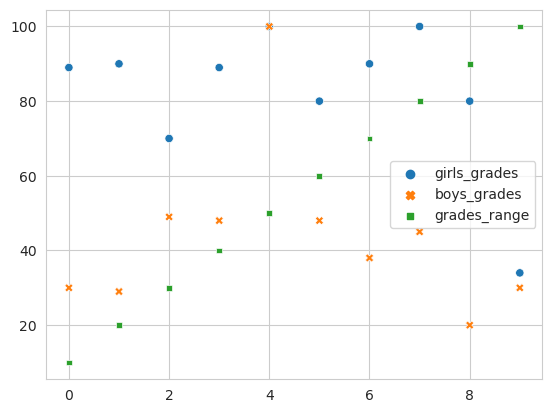

In [41]:
sns.scatterplot(data = df)
plt.show()

#### Sea level

In [42]:
df = pd.read_csv('data/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [43]:
year = df['Year']
sea_levels = df['CSIRO Adjusted Sea Level']*2.54 # convert inches to centimeters

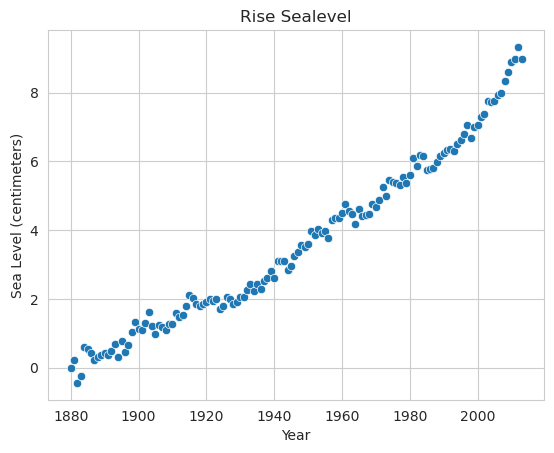

In [44]:
g = sns.scatterplot(data = df,x='Year',y='CSIRO Adjusted Sea Level')
g.set(xlabel='Year',ylabel='Sea Level (centimeters)',title='Rise Sealevel')
plt.show()

### Bubble plot

In [49]:
sheet_df_dictonary = pd.read_excel(r'/home/ernesto/projects/data_science_portfoliio/data/Canada.xlsx', engine='openpyxl', sheet_name=['Canada by Citizenship (2)'], skiprows=0)
df = sheet_df_dictonary['Canada by Citizenship (2)']

In [50]:
df.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [51]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      196 non-null    object
 1   Coverage  196 non-null    object
 2   OdName    196 non-null    object
 3   AREA      196 non-null    int64 
 4   AreaName  196 non-null    object
 5   REG       196 non-null    int64 
 6   RegName   196 non-null    object
 7   DEV       196 non-null    int64 
 8   DevName   196 non-null    object
 9   1980      196 non-null    int64 
 10  1981      196 non-null    int64 
 11  1982      196 non-null    int64 
 12  1983      196 non-null    int64 
 13  1984      196 non-null    int64 
 14  1985      196 non-null    int64 
 15  1986      196 non-null    int64 
 16  1987      196 non-null    int64 
 17  1988      196 non-null    int64 
 18  1989      196 non-null    int64 
 19  1990      196 non-null    int64 
 20  1991      196 non-null    int64 
 21  1992      196 no

In [53]:
df.shape

(196, 43)

#### Drop columns

In [54]:
df = df.drop(columns = ['Type', 'Coverage', 'AREA', 'AreaName',      'REG', 'RegName', 'DEV', 'DevName',]).set_index('OdName')

In [55]:
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [56]:
venezuela = df.loc['Venezuela (Bolivarian Republic of)']
brasil = df.loc['Brazil']

##### Normalize the Data

In [57]:
v_normal = venezuela / venezuela.max()
b_normal = brasil / brasil.max()

In [58]:
years = list(range(1980, 2014))

In [70]:
df1 = pd.DataFrame(v_normal)

In [72]:
df1.columns = ["Number of immigrants"]

In [74]:
df1['Country'] = "Venezuela"

In [75]:
df1

,Number of immigrants,Country
1980,0.070937,Venezuela
1981,0.080579,Venezuela
1982,0.119835,Venezuela
1983,0.085399,Venezuela
1984,0.097796,Venezuela
1985,0.113636,Venezuela
1986,0.123278,Venezuela
1987,0.157713,Venezuela
1988,0.192149,Venezuela
1989,0.209366,Venezuela


In [76]:
df2 = pd.DataFrame(b_normal)
df2.columns = ["Number of immigrants"]
df2['Country'] = "Brasil"
df = pd.concat([df1,df2])
df

,Number of immigrants,Country
1980,0.070937,Venezuela
1981,0.080579,Venezuela
1982,0.119835,Venezuela
1983,0.085399,Venezuela
1984,0.097796,Venezuela
...,...,...
2009,0.965743,Brasil
2010,1.000000,Brasil
2011,0.580446,Brasil
2012,0.632025,Brasil


In [80]:
df.reset_index(inplace=True)

In [82]:
df.columns = ['Years', 'Number of immigrants', 'Country']

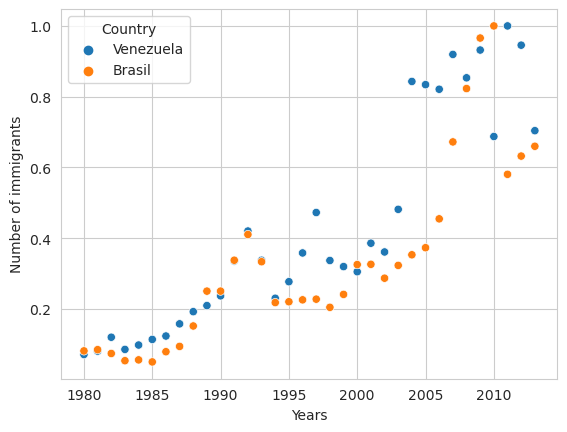

In [83]:
sns.scatterplot(data=df,x='Years',y='Number of immigrants', hue='Country')
plt.show()

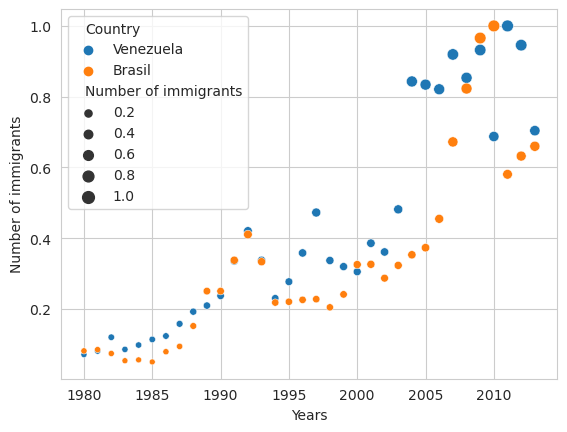

In [84]:
sns.scatterplot(data=df,x='Years',y='Number of immigrants',size='Number of immigrants', hue='Country')
plt.show()

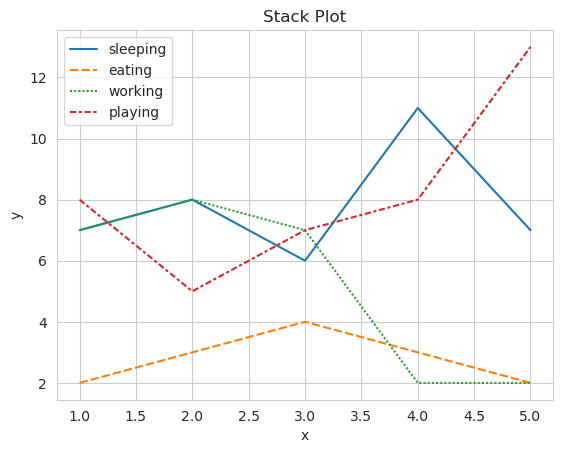

In [93]:
g =sns.lineplot(data=df)
g.set(xlabel='x',ylabel='y',title='Stack Plot')

plt.show()

### Pie chart

In [ ]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()

plt.show()

#### Pokemon type

In [ ]:
url = 'https://raw.githubusercontent.com/hmcuesta/PDA_Book/master/Chapter3/pokemonByType.csv'

pokemon = pd.read_csv(url, index_col='type')

pokemon.head()

In [ ]:


plt.pie(pokemon['amount'], labels=pokemon.index, shadow=False, startangle=90, autopct='%1.1f%%',)
plt.axis('equal') 
plt.show()


### Circle graph

In [ ]:

# Pie chart
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

### Table chart


In [ ]:
# Years under consideration
years = ["2010", "2011", "2012", "2013", "2014"]

# Available watt
columns = ['4.5W', '6.0W', '7.0W','8.5W','9.5W','13.5W','15W']
unitsSold = [
             [65, 141, 88, 111, 104, 71, 99],
             [85, 142, 89, 112, 103, 73, 98],
             [75, 143, 90, 113, 89, 75, 93],
             [65, 144, 91, 114, 90, 77, 92],
             [55, 145, 92, 115, 88, 79, 93],
            ]

# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

In [ ]:
colors = plt.cm.OrRd(np.linspace(0, 0.7, len(years)))
index = np.arange(len(columns)) + 0.3
bar_width = 0.7

y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

cell_text = []

n_rows = len(unitsSold)
for row in range(n_rows):
    plot = plt.bar(index, unitsSold[row], bar_width, bottom=y_offset, 
                   color=colors[row])
    y_offset = y_offset + unitsSold[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
# Each iteration of this for loop, labels each bar with corresponding value for the given year
    for rect in plot:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' 
                % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1 

# Add a table to the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=years, 
                rowColours=colors, colLabels=columns, loc='bottom')
plt.ylabel("Units Sold")
plt.xticks([])
plt.title('Number of LED Bulb Sold/Year')
plt.show()


#### Time using in different hobbies

In [ ]:

 
 
data = [[ 100, 100,  99, 95],
        [ 66, 71,  76,  82],
        [ 73,  75, 79, 81],
        [ 17,  23, 42, 55],
        [ 12, 18, 26, 20]]
 
columns = ('2010', '2012', '2014', '2016')
rows = ("Make Calls", "Take Photos", "Texting", "Internet", "Playing games")[::-1]
 
values = np.arange(0, 50, 10)
value_increment = 10
 
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
 
index = np.arange(len(columns)) + 0.3
bar_width = 0.4
 
# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
 
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
 
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
 
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
 
plt.ylabel("Usage of mobile phones in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Using Mobile Phones')
 
plt.show()

### Treemap chart

In [ ]:
sizes=[100,50,23,74]
squarify.plot(sizes)
plt.show()

In [ ]:



squarify.plot(sizes=[60, 50, 6, 30], color=["Red", "Blue", "Yellow", "Green"])

plt.show()

In [ ]:



squarify.plot(sizes=[60, 50, 6, 30], color=["Red", "Blue", "Yellow", "Green"], label=["A", "B", "C", "D"])

plt.show()

#### Stock market

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hashABCD/Publications/main/Medium/Treemap%20in%20python/market_cap_top20.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

* We need to remove letter "B" in column Market cap
* We need remove letter "%" and convert to type float (Change and Volume)

In [ ]:
df['Market Cap']=df['Market Cap'].apply(lambda x: float(str(x).replace('B','')))
df.Change=df.Change.apply(lambda x:float(str(x).replace('%','')))
df.Volume=df.Volume.apply(lambda x:int(str(x).replace(',','')))

In [ ]:
plt.figure(figsize=(8,6))
squarify.plot(df['Market Cap'], label=df.Ticker,alpha=0.5)
plt.axis('on')
plt.title("Market cap",fontsize=23,fontweight="bold")
plt.show()

### The Sankey class


In [ ]:
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()
plt.show()

### Polar chart

In [ ]:
# Let us assume you have 5 courses in your academic year. 
subjects = ["C programming", "Numerical methods", "Operating system", "DBMS", "Computer Networks"]

# And you planned to obtained following grades in each subject
plannedGrade = [90, 95, 92, 68, 68, 90]

# However, after your final examination, this is the grade you got
actualGrade = [75, 79, 89, 70, 60, 75]

In [ ]:


# 2. Prepare the data set. 
# 3. Set up theta

theta = np.linspace(0, 2 * np.pi, len(plannedGrade))

# 4. Initialize the plot by figure size and polar projection
plt.figure(figsize = (24,20))
plt.subplot(polar=True)

# 5. Get the grid lines to align with each of the subject names.
(lines,labels) = plt.thetagrids(range(0,360, int(360/len(subjects))),
                                                (subjects))

# 6. We use plot method to plot the graph. And fill the area under it. 
plt.plot(theta, plannedGrade)
plt.fill(theta, plannedGrade, 'b', alpha=0.2)

# 7. Now, we plot the actual grade obtained
plt.plot(theta, actualGrade)

# 8. Finally, we add a legend and a nice comprehensible title to the plot. 
plt.legend(labels=('Planned Grades','Actual Grades'),loc=1)
plt.title("Plan vs Actual grades by Subject")

# 9. Lastly, we show the plot on the screen. 
plt.show()

### Histogram

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/nhanes_2015_2016.csv")
df.head()

In [ ]:
df.columns

In [ ]:
df['BPXSY1'].hist(bins = 15, figsize=(8, 6))
plt.xlabel("Systolic Blood Pressure")
plt.title("Distribution of Systolic Blood Pressure")
plt.show()

In [ ]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.hist(bins = 15, figsize=(10,6), alpha = 0.6)
plt.show()

In [ ]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
)
plt.show()

In [ ]:
df[['BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2']].hist(
    bins=15,
    figsize=(12, 6),
    grid = False,
    rwidth = 0.9,
    sharex = True,
    sharey = True
)
plt.show()

###  Lollipot chart


In [ ]:
# 1. Read the dataset

carDF = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%202/cardata.csv')

# 2. Group by manufacturer and take average milage
processedDF = carDF[['cty','manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())

# 3. Sort the values by cty and reset index
processedDF.sort_values('cty', inplace=True)
processedDF.reset_index(inplace=True)

In [ ]:
processedDF.head()

In [ ]:
processedDF.info()

In [ ]:


# 4. Plot the graph
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=processedDF.index, ymin=0, ymax=processedDF.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=processedDF.index, y=processedDF.cty, s=75, color='firebrick', alpha=0.7)

# 5. Annotate Title
ax.set_title('Lollipop Chart for Highway Mileage using car dataset', fontdict={'size':22})

# 6. Anotate labels and xticks, ylim
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF.manufacturer.str.upper(), rotation=65, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# 7. Write the values in the plot
for row in processedDF.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

# 8. Display the plot on the screen
plt.show()

#### Company sales

In [ ]:
df = pd.read_csv("data/company_sales_data.csv")

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:

  
# creating an empty chart
fig, axes = plt.subplots()
  
# plotting using plt.stem
axes.stem(df['month_number'], df['total_profit'],
          use_line_collection=True, basefmt=' ')
  
# starting value of y-axis
axes.set_ylim(0)
  
# details and formatting of chart
plt.title('Total Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(df['month_number'])

 
plt.show()

### Heatmap chart

In [ ]:
data = np.random.random(( 12 , 12 ))
plt.imshow( data , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()

In [ ]:
Z = np.random.rand( 15 , 15 )
  
plt.pcolormesh( Z , cmap = 'summer' )
  
plt.title( '2-D Heat Map' )
plt.show()
